In [1]:
#Playing around with data visualizations to compare boro and total traffic

In [2]:

#imports (use pip install 'package')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
from scipy.stats import ttest_ind
import geocoder
import folium
from haversine import haversine
% matplotlib inline
import seaborn as sns
from matplotlib import rcParams
import datetime

In [15]:
#Load the csv file for green taxis August 2013 into a pandas dataframe
green = pd.read_csv('Cleaned_Green_Count.csv')
df_green = pd.DataFrame(green)

#Load the cleaned csv file for NYC 2012-2013 traffic into a pandas datafram
traffic = 'Cleaned_Traffic_Count_coordinates.csv'
df_traffic = pd.read_csv(traffic)

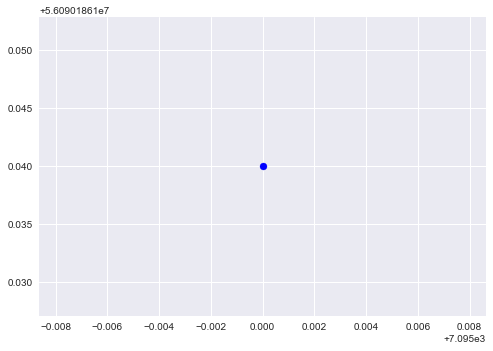

In [13]:
#Visualize the difference in size of the two datasets. Traffic is two years worth of overall traffic in NYC. Green is just the collected data from the boro taxis

greenSum = len(df_green)
trafficSum = df_traffic['Total Traffic'].sum()

long = 
# Plot the first set of data
plt.scatter(greenSum, trafficSum, c='blue')

#fig, ax  = plt.subplots()
#ax.bar([1, 2], [greenSum, trafficSum], width=1,
    #   tick_label=['Total Boro Data', 'Total Traffic Data'], align='center')

In [16]:
df_traffic

,Unnamed: 0,Segment ID,Roadway Name,From,To,From Lat,From Lon,To Lat,To Lon
0,0,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,40.543227,-74.197284,40.542538,-74.197009
1,1,6644,RICHMOND HILL ROAD,EDINBORO ROAD,FOREST HILL ROAD,40.581193,-74.153053,40.580614,-74.152527
2,2,7564,MORLEY AVENUE,DALTON AVENUE,EBONY STREET,40.575439,-74.126911,40.575720,-74.126045
3,3,11599,OCEAN TERRACE,BUTTERWORTH AVENUE,COVERLY AVENUE,40.603704,-74.105791,40.603357,-74.104744
4,4,12945,LITTLE CLOVE RD,CAYUGA AVENUE,RENWICK AVENUE,40.610864,-74.100428,40.611177,-74.105598
5,5,13133,CLOVE RD,HOWARD AVENUE,LITTLE CLOVE ROAD,40.612444,-74.099294,40.611420,-74.098623
6,6,14602,HYLAN BOULEVARD,FINGERBOARD ROAD,RODERICK AVENUE,40.601470,-74.072462,40.602224,-74.073584
7,7,17319,86 STREET,7 AVENUE,14 AVENUE,40.618472,-74.021214,40.612735,-74.011712
8,8,17652,4 AVENUE,68 STREET,SENATOR STREET,40.635318,-74.023235,40.636111,-74.022913
9,9,18635,CROPSEY AVE,BAY 22nd ST,BAY 23rd ST,40.601020,-74.004363,40.600625,-74.003594
